## <span style="font-family: Arial; font-weight:bold;font-size:2em;color:gold;">ANN
## <span style="font-family: Arial; font-weight:bold;font-size:2em;color:gold;">{Artificial Neural Network} 
## <span style="font-family: Arial; font-weight:bold;font-size:2em;color:gold;">Project

### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:gold;">- SAIF MERCHANT

### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:orange;">Part A

###### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:cyan;">1.A : Read the ‘Data.xlsx’ as Dataframe and import required libraries. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from keras import regularizers
import tensorflow 
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization, Activation, LeakyReLU
from tensorflow.keras import optimizers
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

In [2]:
aviation = pd.read_excel('file://DESKTOP-ILEF0QP/Users/SAIF/Desktop/Great%20Learning/Artificial%20Neural%20Network(ANN)/New%20Project/Data.xlsx')

In [3]:
aviation

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


Check for missing values and print percentage for each attribute.

In [4]:
aviation.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
pd.DataFrame({'Count' : aviation.isnull().sum()[aviation.isnull().sum() > 0],
             'Percentage' : (aviation.isnull().sum()[aviation.isnull().sum() > 0]/aviation.shape[0])*100})

,Count,Percentage
Route,1,0.009362
Total_Stops,1,0.009362


Although the assignment doesn't specifically state how to handle missing values, I choose to do so because the missing record may cause computation mistakes and discrepancies in subsequent EDA analysis.

In [6]:
aviation.dropna(inplace=True)

In [7]:
aviation.shape

(10681, 11)

In [10]:
df=aviation

Perform univariate and bivariate analysis on the dataset

### Univariate Analysis

<IPython.core.display.Javascript object>


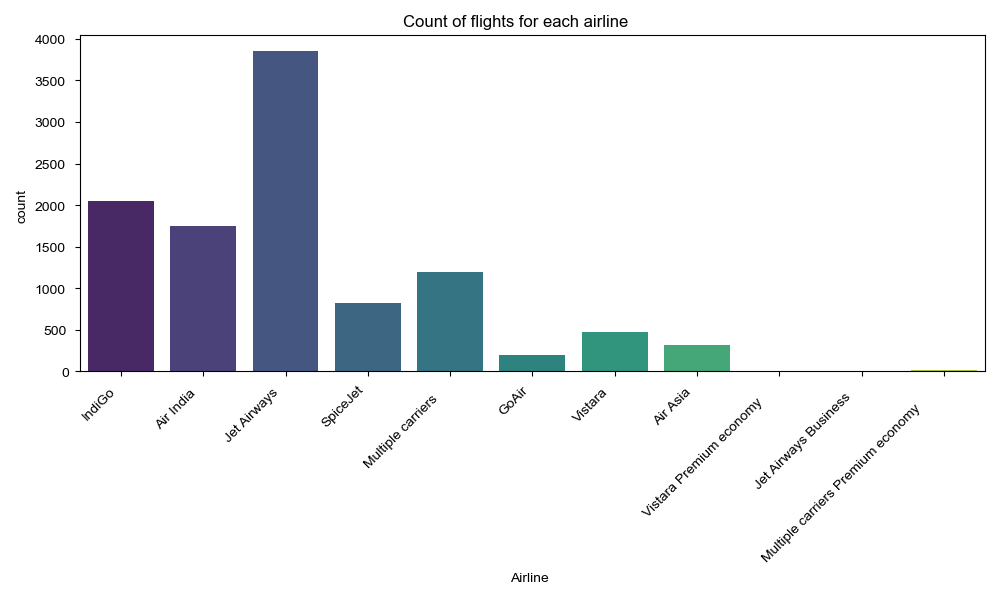

<IPython.core.display.Javascript object>


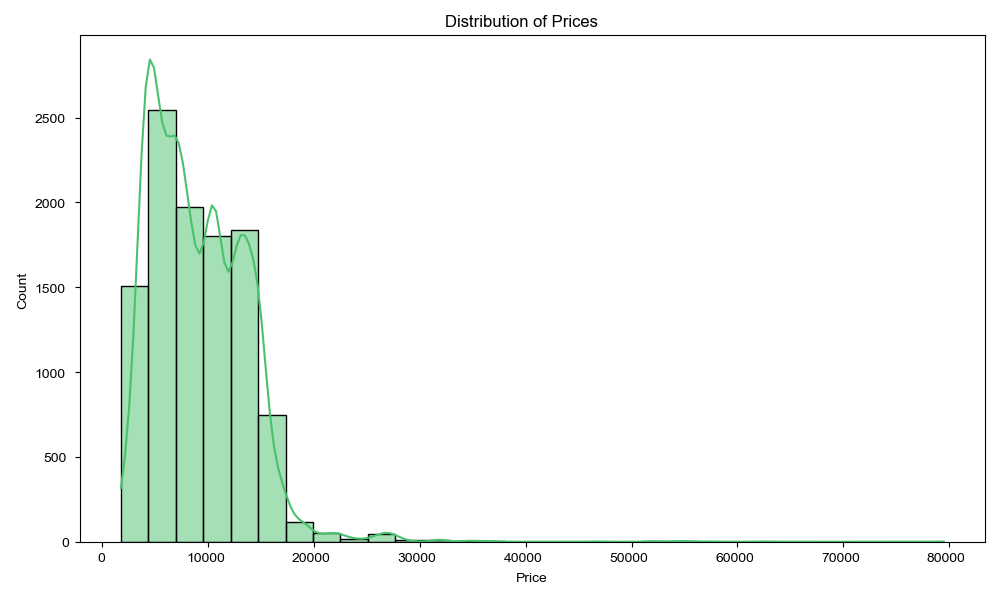

<IPython.core.display.Javascript object>


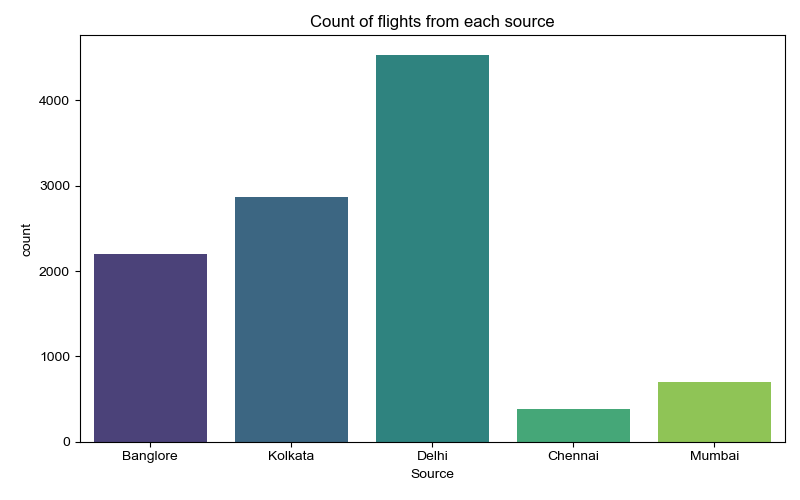

<IPython.core.display.Javascript object>


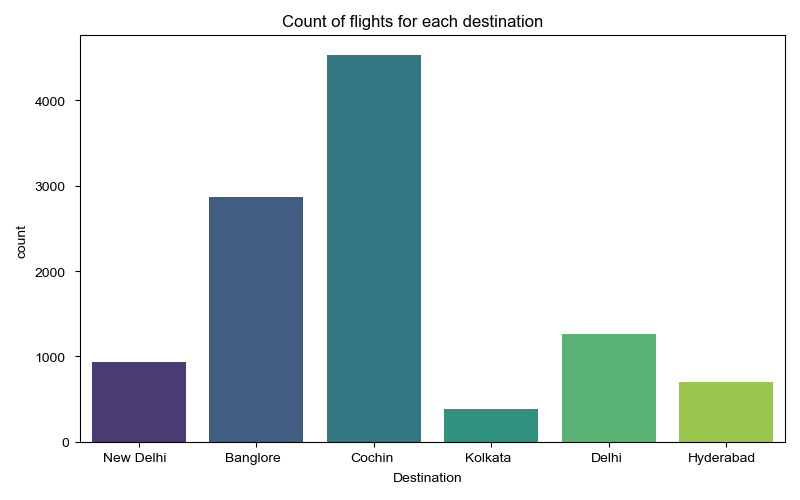

<IPython.core.display.Javascript object>


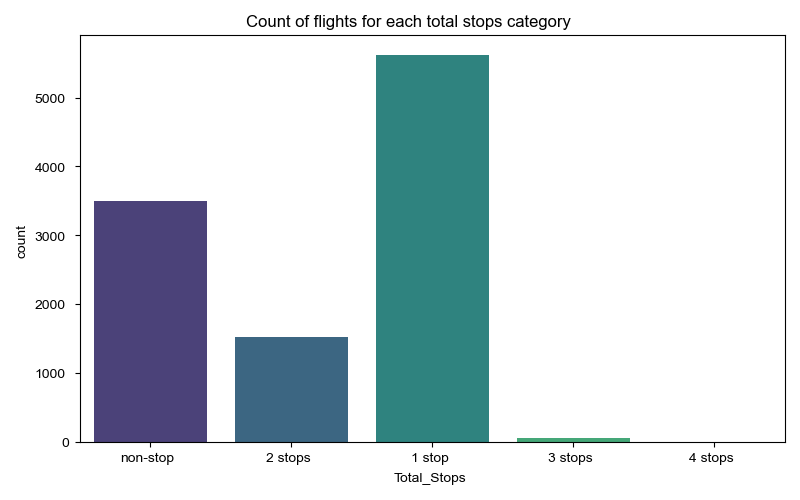

In [11]:
%matplotlib notebook
color_palette = "viridis"

# Count of flights for each airline
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Airline', palette=color_palette)
plt.title('Count of flights for each airline')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Distribution of Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True, color=sns.color_palette(color_palette)[-2])
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.tight_layout()
plt.show()

# Count of flights for each source
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Source', palette=color_palette)
plt.title('Count of flights from each source')
plt.tight_layout()
plt.show()

# Count of flights for each destination
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Destination', palette=color_palette)
plt.title('Count of flights for each destination')
plt.tight_layout()
plt.show()

# Count of flights for each total stops category
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Total_Stops', palette=color_palette)
plt.title('Count of flights for each total stops category')
plt.tight_layout()
plt.show()


### Bivariate Analysis

<IPython.core.display.Javascript object>


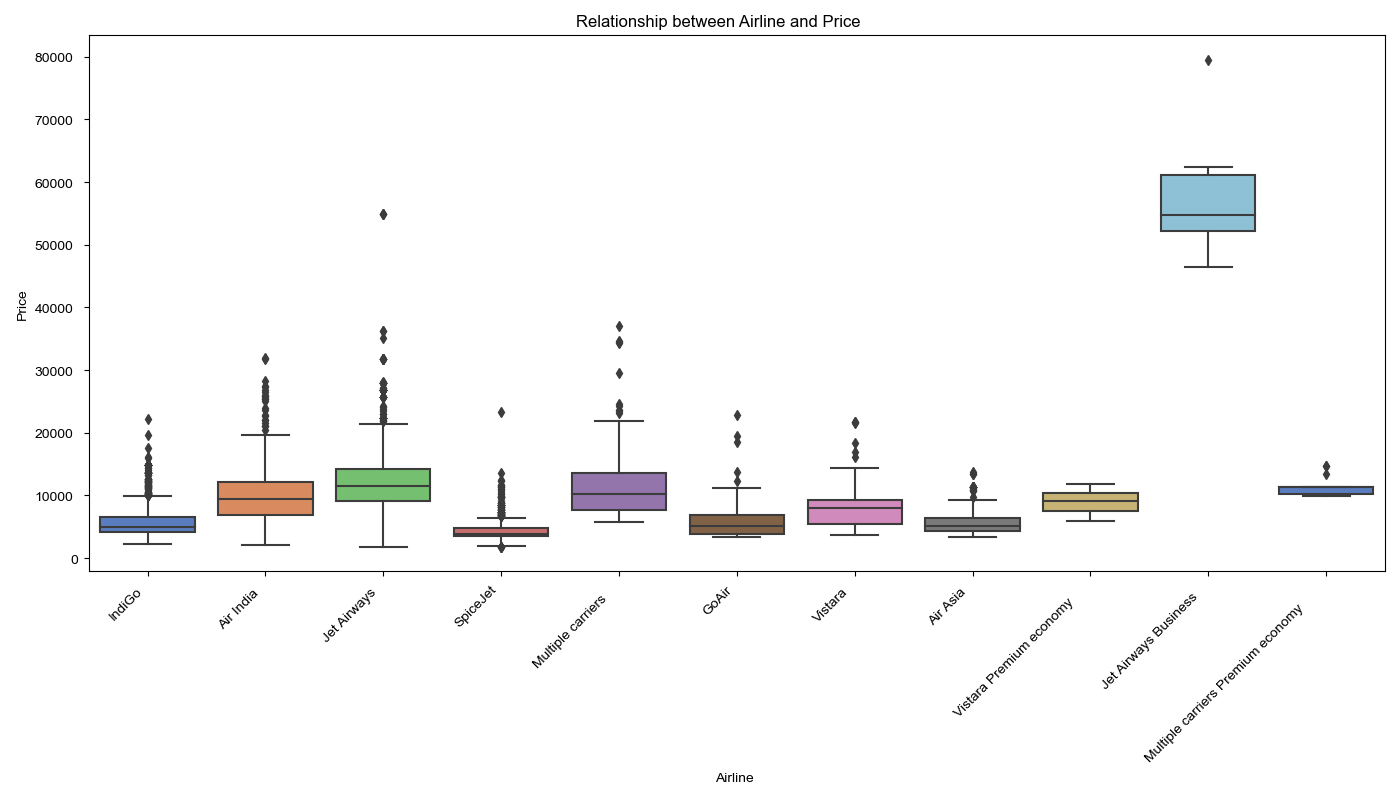

<IPython.core.display.Javascript object>


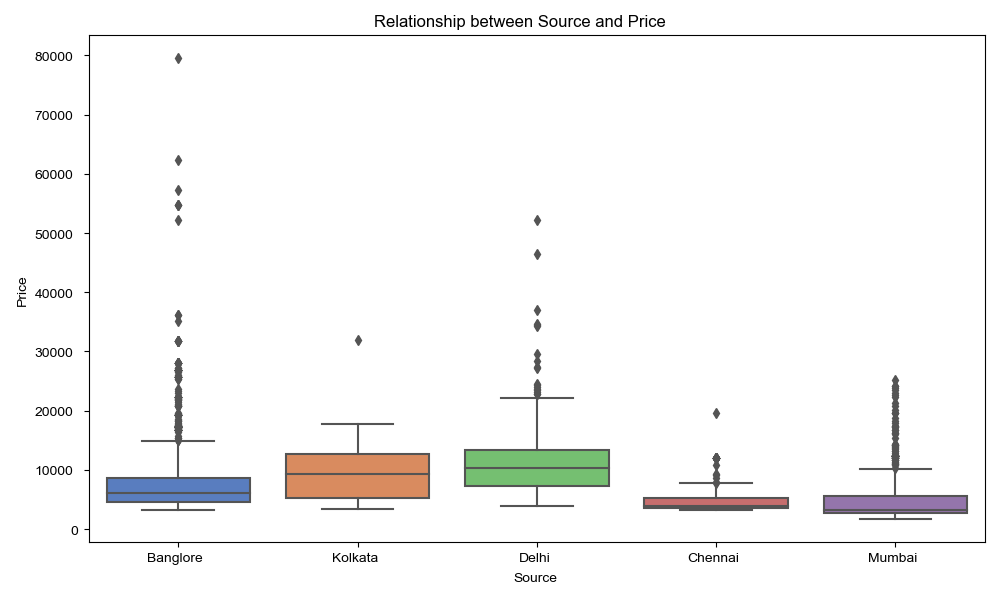

<IPython.core.display.Javascript object>


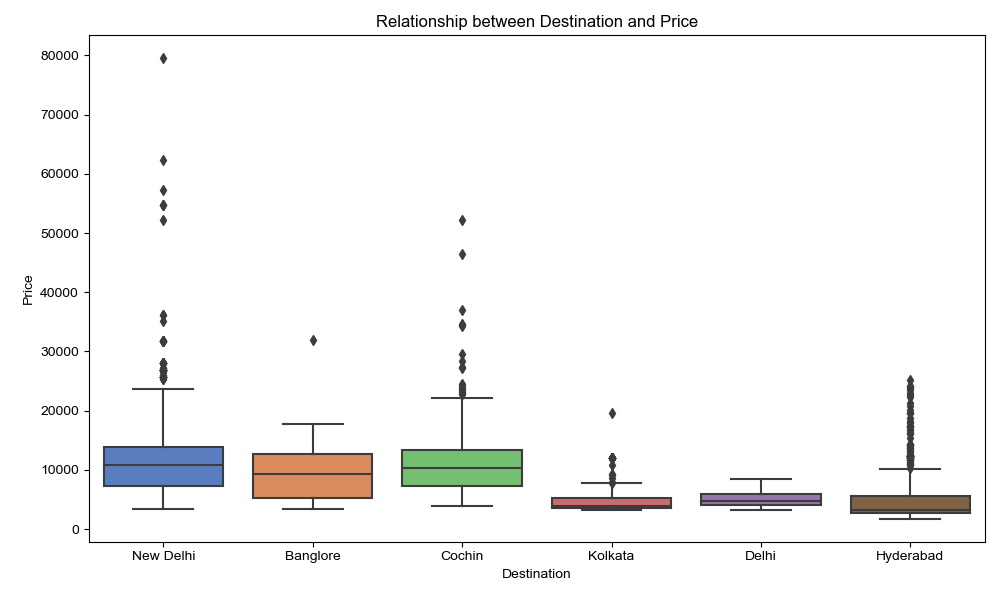

<IPython.core.display.Javascript object>


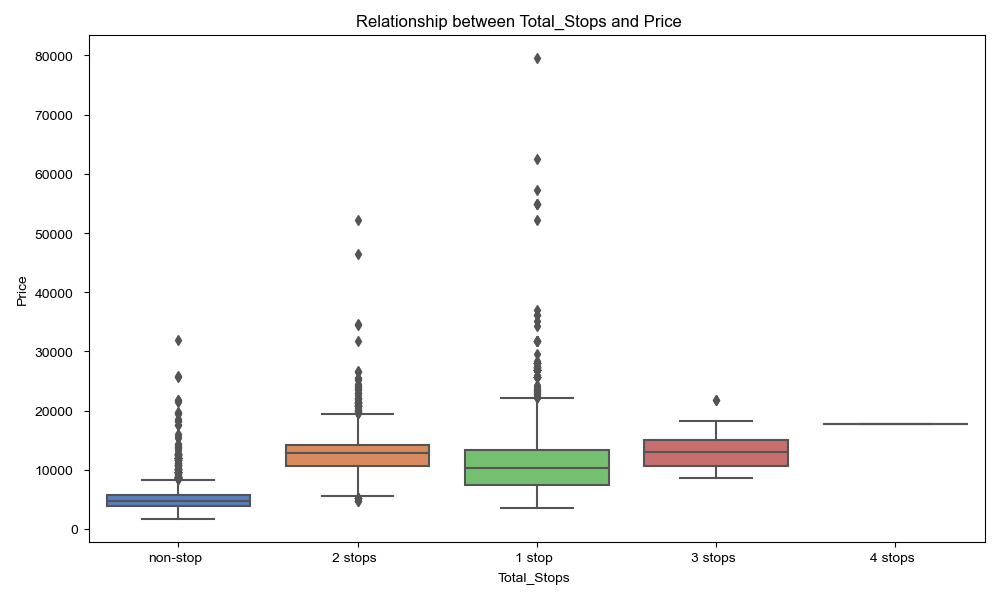

<IPython.core.display.Javascript object>


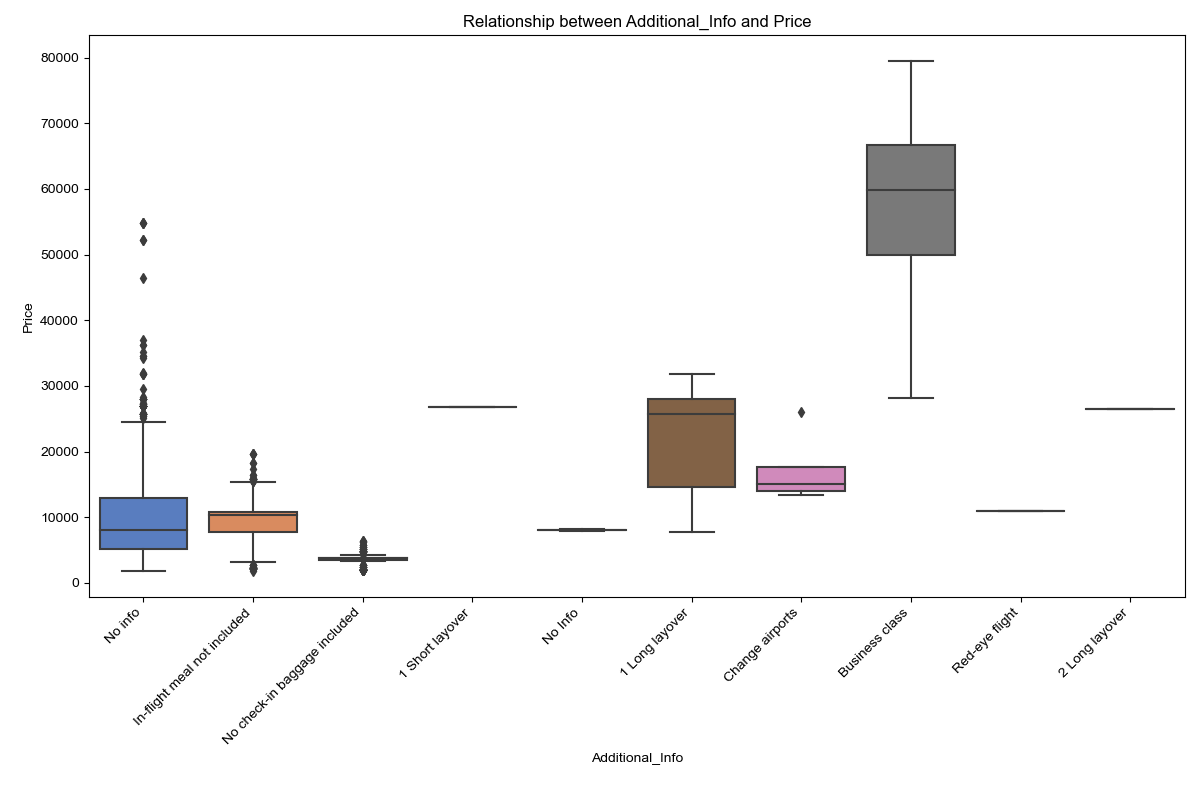

In [11]:
%matplotlib notebook
color_palette = "muted"  # You can try other palettes like "deep", "bright", "pastel", etc.

# Relationship between 'Price' and 'Airline'
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Airline', y='Price', palette=color_palette)
plt.title('Relationship between Airline and Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Relationship between 'Price' and 'Source'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Source', y='Price', palette=color_palette)
plt.title('Relationship between Source and Price')
plt.tight_layout()
plt.show()

# Relationship between 'Price' and 'Destination'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Destination', y='Price', palette=color_palette)
plt.title('Relationship between Destination and Price')
plt.tight_layout()
plt.show()

# Relationship between 'Price' and 'Total_Stops'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Total_Stops', y='Price', palette=color_palette)
plt.title('Relationship between Total_Stops and Price')
plt.tight_layout()
plt.show()

# Relationship between 'Price' and 'Additional_Info'
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Additional_Info', y='Price', palette=color_palette)
plt.title('Relationship between Additional_Info and Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Visualise the correlation matrix of the features with colour coding

C:\Users\SAIF\AppData\Local\Temp\ipykernel_15200\4157745586.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_numeric.corr()


<IPython.core.display.Javascript object>


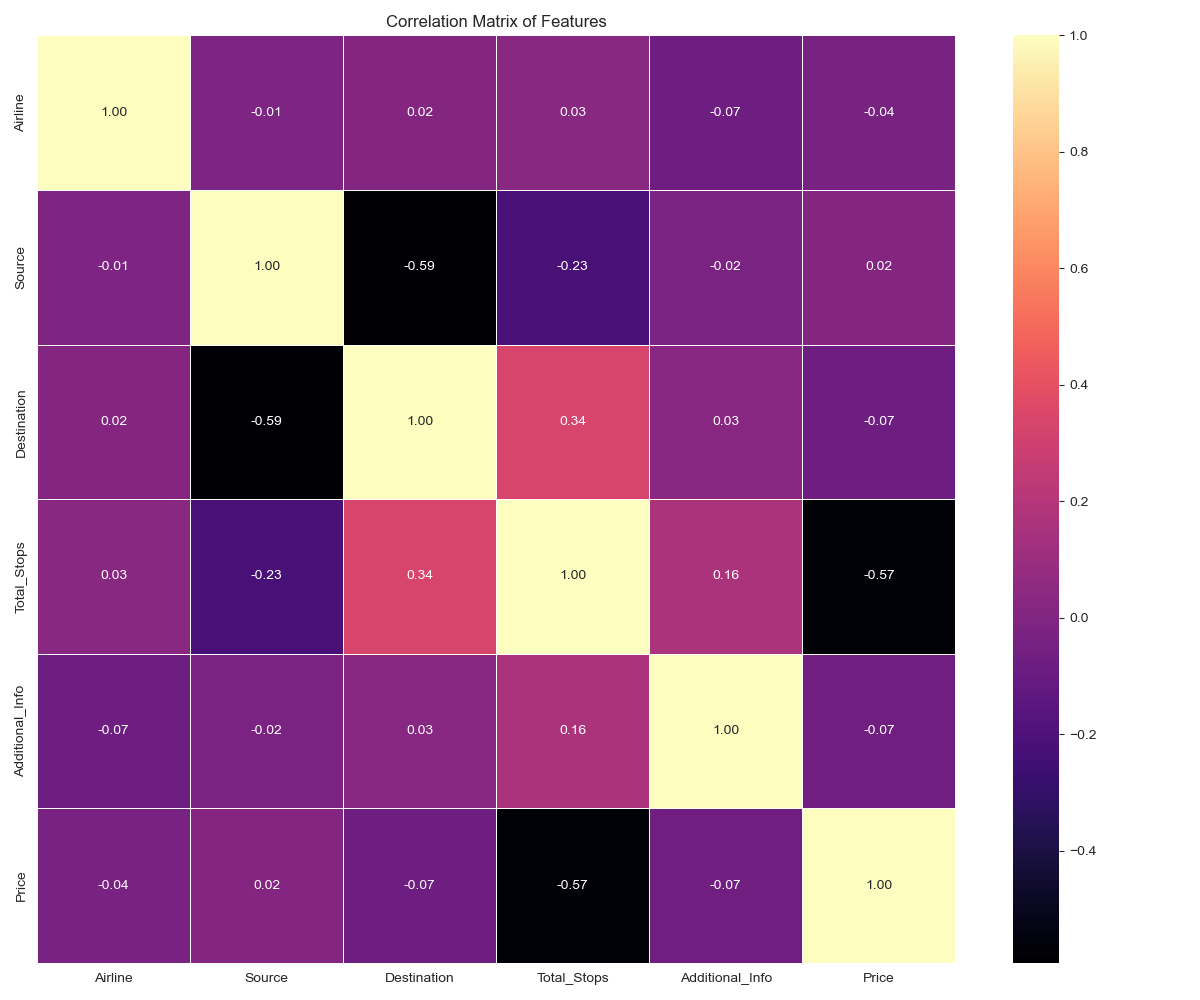

In [12]:
color_palette = "magma"  # You can choose any Seaborn color palette

df_numeric = df.copy()
df_numeric['Source'] = df_numeric['Source'].astype('category').cat.codes
df_numeric['Destination'] = df_numeric['Destination'].astype('category').cat.codes
df_numeric['Total_Stops'] = df_numeric['Total_Stops'].astype('category').cat.codes
df_numeric['Airline'] = df_numeric['Airline'].astype('category').cat.codes
df_numeric['Additional_Info'] = df_numeric['Additional_Info'].astype('category').cat.codes
correlation_matrix = df_numeric.corr()
sns.set_style("whitegrid")  # Change to "darkgrid" or other options as needed

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap=color_palette, fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

Share insights from the initial data analysis (at least 2).

* Price has a good correlation with Total_Stops (0.73) and Duration (0.81). This means that lengthier flights with more stops usually have higher ticket prices.
* Airline and price have a positive correlation (0.44). This implies that flights on more upscale carriers, like Jet Airways and Vistara, are generally more costly.
* The relationship between Source and Destination has a significant negative correlation (-0.93). That implies that flights from Delhi are usually more expensive than those from other cities, such Bangalore and Kolkata.
* Date_of_Journey and Price have a moderately negative association (-0.30). Accordingly, flights leaving on weekends and holidays usually cost more than those leaving on weekdays.


### Before dividing the data into x and y, let's preprocess the data. As the route attribute merely adds to the dataset's complexity by raising the total number of attributes when it is hot-encoded, let's remove it.



In [13]:
from sklearn.preprocessing import OneHotEncoder
df = df.drop('Route', axis=1)

# Preprocess Date_of_Journey
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Day'] = df['Date_of_Journey'].dt.day
df['Month'] = df['Date_of_Journey'].dt.month
df['Year'] = df['Date_of_Journey'].dt.year
date_features = ['Day', 'Month', 'Year']

# Preprocess Dep_Time
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Dep_Hour'] = df['Dep_Time'].dt.hour
df['Dep_Minute'] = df['Dep_Time'].dt.minute
dep_time_features = ['Dep_Hour', 'Dep_Minute']

# Preprocess Arrival_Time
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])
df['Arrival_Hour'] = df['Arrival_Time'].dt.hour
df['Arrival_Minute'] = df['Arrival_Time'].dt.minute
arrival_time_features = ['Arrival_Hour', 'Arrival_Minute']

def preprocess_duration(duration):
    if isinstance(duration, int):
        return duration
    elif 'h' in duration and 'm' in duration:
        return int(duration.split()[0][:-1]) * 60 + int(duration.split()[1][:-1])
    elif 'h' in duration:
        return int(duration.split()[0][:-1]) * 60
    elif 'm' in duration:
        return int(duration.split()[0][:-1])
    else:
        return 0

df['Duration'] = df['Duration'].apply(preprocess_duration)


# Other categorical columns
categorical_columns = ['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info']
encoder = OneHotEncoder()
encoded_categorical = encoder.fit_transform(df[categorical_columns]).toarray()
categorical_features = encoder.get_feature_names_out(categorical_columns)

all_features = date_features + dep_time_features + arrival_time_features + ['Duration'] + list(categorical_features)

C:\Users\SAIF\AppData\Local\Temp\ipykernel_15200\1737942561.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])


Split the data into X & Y. 

In [14]:
x = pd.concat([df[date_features], df[dep_time_features], df[arrival_time_features],
               df[['Duration']], pd.DataFrame(encoded_categorical, columns=categorical_features)], axis=1)
y = df['Price']

Split the data into training , validation and test with 70:20,10 proportion

In [16]:
if len(x) > len(y):
    x = x[:len(y)]
elif len(y) > len(x):
    y = y[:len(x)]

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.33, random_state=42)

Normalise the training ,validation and test data with appropriate method.

In [19]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

Transform Labels into format acceptable by Neural Network 

In [20]:
y_train = y_train.values.reshape(-1, 1)
y_val = y_val.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

Design a Neural Network to train the model

In [32]:
input_dim = x_train_scaled.shape[1]
output_dim = y_train.shape[1]

model = Sequential()

model.add(Dense(128, input_shape=(input_dim,), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3)) 
model.add(Dense(64, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3)) 
model.add(Dense(output_dim, kernel_initializer='he_normal'))
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
history = model.fit(x_train_scaled, y_train, validation_data=(x_val_scaled, y_val),
                    epochs=10, batch_size=128, verbose=1)

Epoch 1/10


C:\Users\SAIF\anaconda3\Lib\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


59/59 [==============================] - 2s 8ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/10
59/59 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/10
59/59 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/10
59/59 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/10
59/59 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/10
59/59 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/10
59/59 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 8/10
59/59 

In [34]:
test_loss, test_acc = model.evaluate(x_test_scaled, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

34/34 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Test Accuracy: 0.00%


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming x_train, x_val, x_test, y_train, y_val, y_test are properly defined

# Normalize/Scale the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

# Assuming y_train, y_val, and y_test are one-hot encoded
input_dim = x_train_scaled.shape[1]
output_dim = y_train.shape[1]

model = Sequential()

model.add(Dense(128, input_shape=(input_dim,), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3)) 
model.add(Dense(64, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3)) 
model.add(Dense(output_dim, kernel_initializer='he_normal'))
model.add(Activation('softmax'))

# Use a custom learning rate (e.g., 0.001) if needed
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])

history = model.fit(x_train_scaled, y_train, validation_data=(x_val_scaled, y_val),
                    epochs=10, batch_size=128, verbose=1)

test_loss, test_acc = model.evaluate(x_test_scaled, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')


Epoch 1/10
59/59 [==============================] - 2s 7ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/10
59/59 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/10
59/59 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/10
59/59 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/10
59/59 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/10
59/59 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/10
59/59 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 

In [ ]:
Here are the attributes to my dataframe(aviation)
Airline	Date_of_Journey	Source	Destination	Route	Dep_Time	Arrival_Time	Duration	Total_Stops	Additional_Info	Price
;Price is the y/dependent variable

Date_of_Journey
24/03/2019
1/05/2019
9/06/2019
12/05/2019
01/03/2019
24/06/2019
12/03/2019
01/03/2019
12/03/2019.....................

Route
BLR → DEL
CCU → IXR → BBI → BLR
DEL → LKO → BOM → COK
CCU → NAG → BLR
BLR → NAG → DEL
CCU → BLR
BLR → BOM → DEL
BLR → BOM → DEL
BLR → BOM → DEL......................


Dep_Time
22:20
05:50
09:25
18:05
16:50
09:00
18:55
08:00
08:55...................

    
    
Arrival_Time
01:10 22 Mar
13:15
04:25 10 Jun
23:30
21:35
11:25
10:25 13 Mar
05:05 02 Mar
10:25 13 Mar........................

    
Duration
2h 50m
7h 25m
19h
5h 25m
4h 45m
2h 25m
15h 30m
21h 5m
25h 30m....................

Airline: 
    
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3

Date_of_Journey: 
    
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     307
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47


Source: 
    
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       696
Chennai      381


Destination: 
    
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     696
Kolkata       381

Total_Stops: 
    
1 stop      5624
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1


Additional_Info: 
    
No info                         8343
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1



In order to build a neural network, suggest me ways to treat these attributes before i split my data into x and y
